In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline



df = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, sep=",")
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [131]:
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]

In [132]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.119396,0.878624,0.828210
sepal_width,-0.119396,1.000000,-0.420516,-0.356544
petal_length,0.878624,-0.420516,1.000000,0.962757
petal_width,0.828210,-0.356544,0.962757,1.000000


In [117]:
corr_dict = corr.to_dict()
corr_dict

{'petal_length': {'petal_length': 1.0,
  'petal_width': 0.96275709705096668,
  'sepal_length': 0.87862418225862138,
  'sepal_width': -0.42051609640115484},
 'petal_width': {'petal_length': 0.96275709705096668,
  'petal_width': 1.0,
  'sepal_length': 0.82821042284782964,
  'sepal_width': -0.35654408961380551},
 'sepal_length': {'petal_length': 0.87862418225862138,
  'petal_width': 0.82821042284782964,
  'sepal_length': 1.0,
  'sepal_width': -0.11939564258562468},
 'sepal_width': {'petal_length': -0.42051609640115484,
  'petal_width': -0.35654408961380551,
  'sepal_length': -0.11939564258562468,
  'sepal_width': 1.0}}

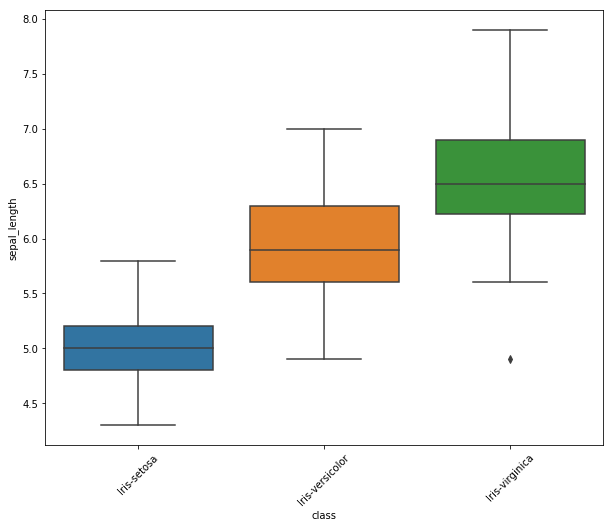

In [137]:
plt.figure(figsize=(10,8))
sns.boxplot(x='class', y='sepal_length', data=df)
xt = plt.xticks(rotation=45)

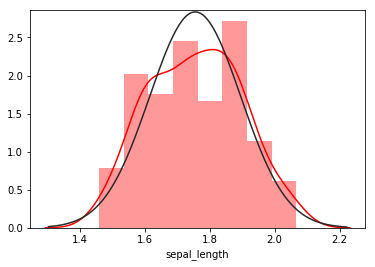

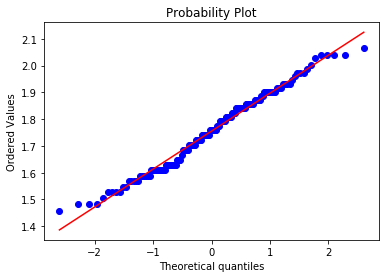

In [113]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['sepal_length'], color='r',fit=norm)
fig = plt.figure()
res = stats.probplot(df['sepal_length'], plot=plt)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


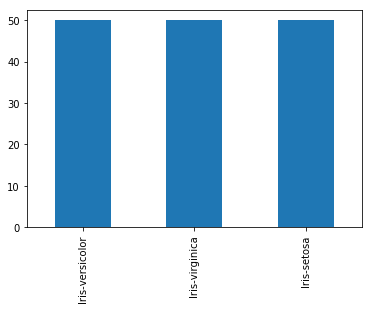

In [24]:
import matplotlib.pyplot as plt
df["class"].value_counts().plot(kind='bar')
plt.show()

In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


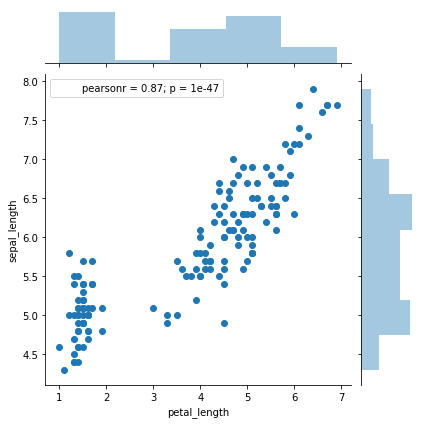

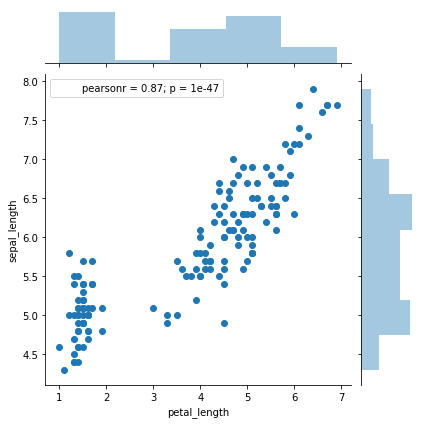

In [9]:
#petal length is strongly related to sepal length and petal width
sns.jointplot(x='petal_length', y='sepal_length', data=df, kind='scatter')
plt.show()

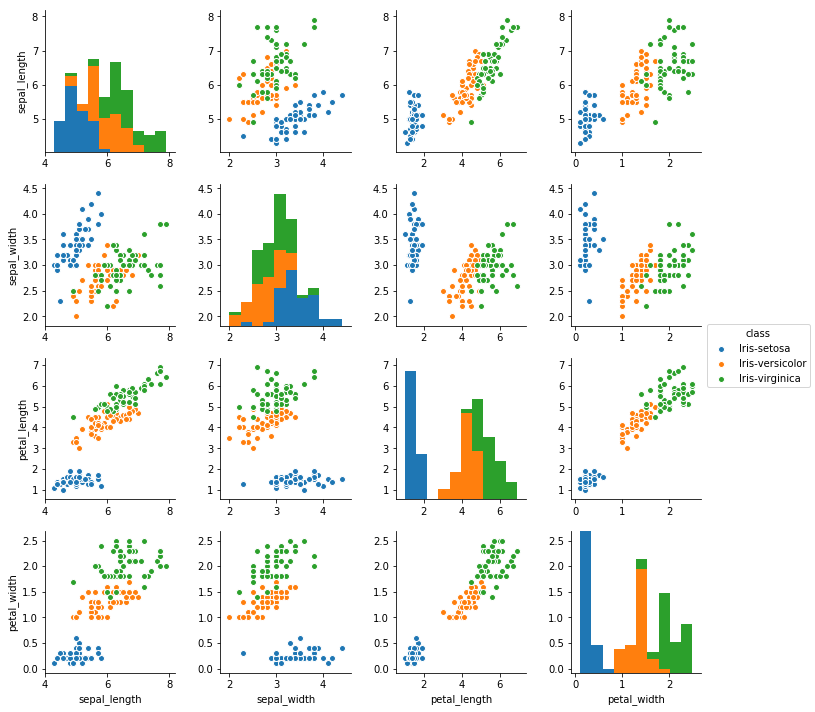

In [62]:
sns.pairplot(df, hue='class')
plt.show()

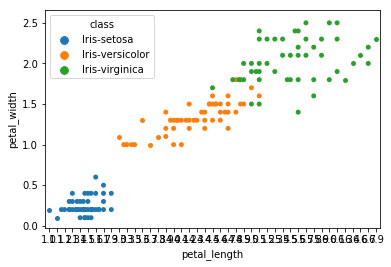

In [11]:
sns.swarmplot(x='petal_length', y='petal_width', data=df, hue='class')
plt.show()

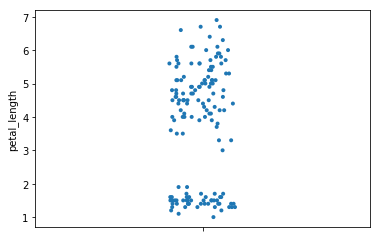

In [13]:
sns.stripplot(y='petal_length', data=df, size=4, jitter=True)
plt.show()

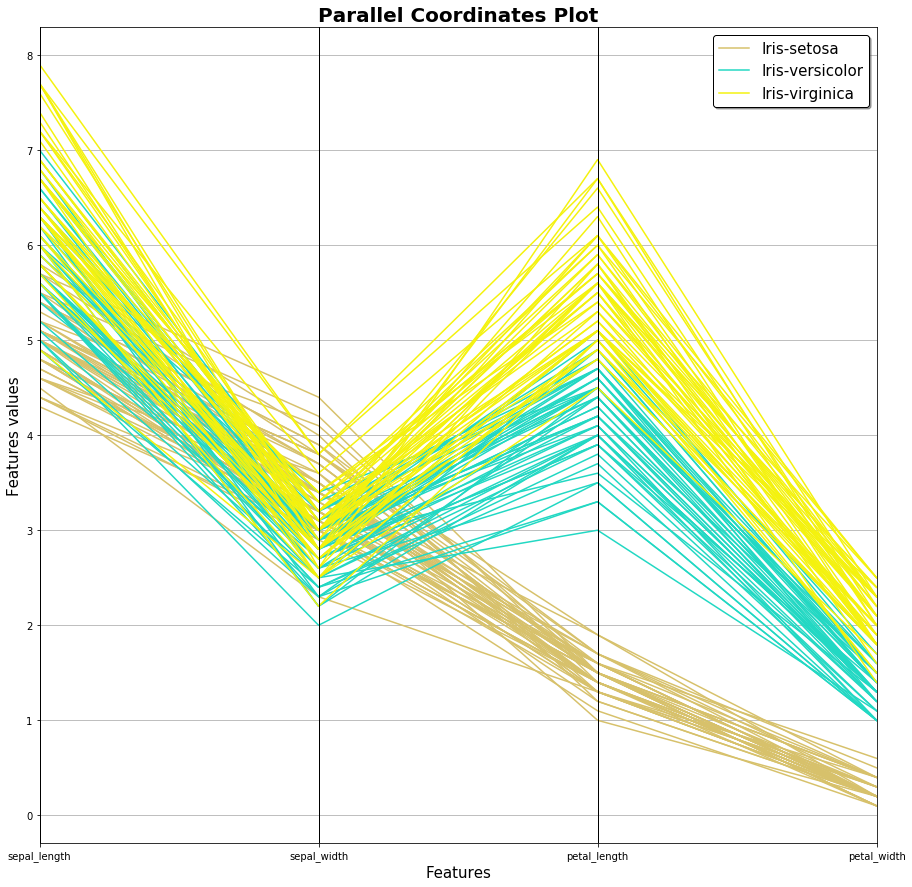

In [93]:
#Parallel coordinates is a plotting technique for plotting multivariate data.
#It allows one to see clusters in data and to estimate other statistics visually. 
#Using parallel coordinates points are represented as connected line segments. 
#Each vertical line represents one attribute.
#One set of connected line segments represents one data point.
#Points that tend to cluster will appear closer together.
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,15))
parallel_coordinates(df, "class")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

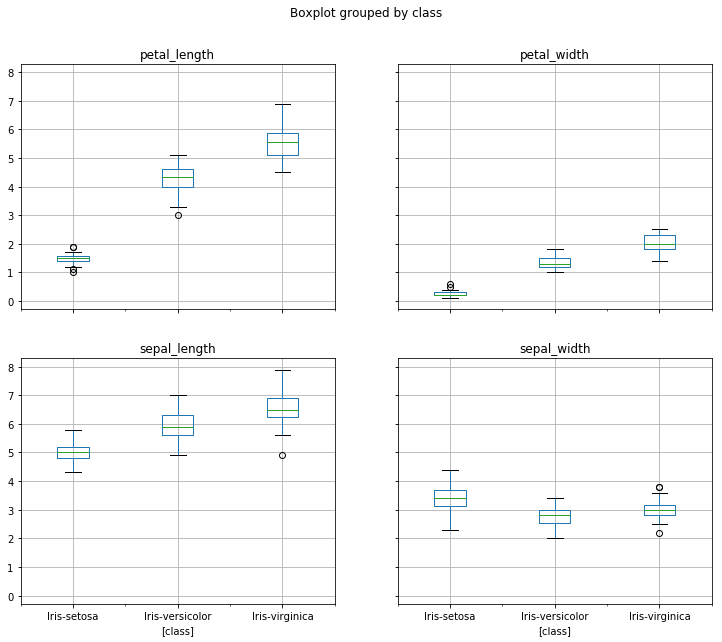

In [78]:
plt.figure()
df.boxplot(by="class", figsize=(12, 10))
plt.show()

In [92]:
feature_columns = ["sepal_length","sepal_width","petal_length","petal_width"]
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
print("Accuracy of our model is " + str(round(accuracy,2)) + "%")
cm = confusion_matrix(y_test, pred)
print(cm)



Accuracy of our model is 93.33%
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [21]:
#10 fold cross validation with k=5 for KNN
#dont use train and test set, directly use X and y
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [19]:
#Use average accuracy
print("Average accuracy of our model is " + str(round(score.mean()*100,2)) + "%")

Average accuracy of our model is 96.67%


In [22]:
#search for an optimal value of for KNN
k_range = range(1, 31)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_score.append(score.mean()*100)
print(k_score)    

[96.0, 95.333333333333343, 96.666666666666657, 96.666666666666657, 96.666666666666686, 96.666666666666686, 96.666666666666686, 96.666666666666686, 97.333333333333343, 96.666666666666686, 96.666666666666686, 97.333333333333343, 98.000000000000014, 97.333333333333343, 97.333333333333343, 97.333333333333343, 97.333333333333343, 98.000000000000014, 97.333333333333343, 98.000000000000014, 96.666666666666657, 96.666666666666657, 97.333333333333343, 96.0, 96.666666666666657, 96.0, 96.666666666666657, 95.333333333333343, 95.333333333333343, 95.333333333333343]


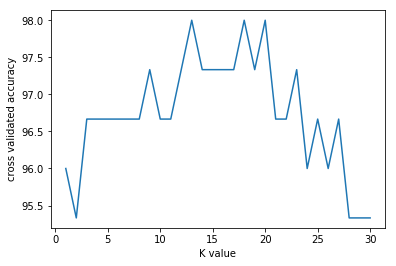

In [28]:
plt.plot(k_range, k_score)
plt.xlabel('K value')
plt.ylabel('cross validated accuracy')
#plt.axis([10,20,96.5,98])
plt.show()

In [30]:
#more efficient parameter tuning can be done using GridSearchCV which basically replaces the for loop we just define
from sklearn.model_selection import GridSearchCV 

In [33]:
#define the parameter values that should be searched
k_range = range(1, 31)

In [34]:
#Create a parameter grid:map the parameter name you want to tune with the values for which you want it to search
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [35]:
#instantiate the grid
#grid is a object which is ready to do 10 fold cross validation on a knn model using classification accuracy as evaluation matrix
#and it will do it for a value of parameter n_neighbors from 1 to 30.
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

#you can set n_jobs = -1 to run computations in parallel(if supported by your computer and OS)


In [36]:
#fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [37]:
#view the complete results(list of tuples)
grid.grid_scores_


C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [43]:
#examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [44]:
#create a list of mean score only using list comprehension
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


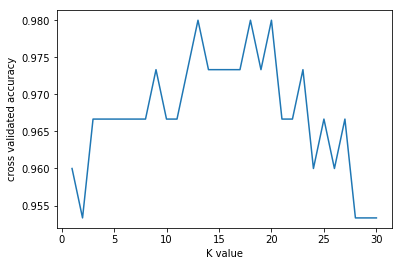

In [45]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('K value')
plt.ylabel('cross validated accuracy')
#plt.axis([10,20,96.5,98])
plt.show()

#same as above

In [46]:
#plotting is not the best way to find best model so
#examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [47]:
#Searching multiple parameters simultaneously
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

In [48]:
#Create a parameter grid:map the parameter name you want to tune with the values for which you want it to search
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}


In [49]:
#instantiate the grid
#grid is a object which is ready to do 10 fold cross validation on a knn model using classification accuracy as evaluation matrix
#and it will do it for a value of parameter n_neighbors from 1 to 30.
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
#View the result
grid.grid_scores_

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [52]:
#Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [90]:
#Finally using the best parameters to make predictions
#initiate the model with best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(round(score.mean()*100,3))

#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

98.0


In [55]:
#Searching many different parameters at once may be computationaly infeasible
#RandomizedSearchCV searches a subset of parameters and we can control it
from sklearn.model_selection import RandomizedSearchCV

In [56]:
#Specify "parameter distribution" rather than "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

#Specify a continous distribution (rather than a list of values) for any continous parameter


In [62]:
# n_iter controls the number of searches
# start with a small number and by observing how much did it take you can increase its value

rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X,y)
rand.grid_scores_

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [63]:
print (rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [71]:
# run RandomizedSearch 20 times and record the best score
best_scores = []
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X,y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

#it took a more time to execute this
    

[0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998]


In [138]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier()
n_range = range(1,50)
param_grid_rf = dict(n_estimators=n_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring='accuracy')

In [140]:
grid_rf.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [141]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.966666666667
{'n_estimators': 2}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
